In [49]:
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
#f_path = "/Library/Fonts/AppleGothic.ttf (맥, Mac)
f_path = "C:/Windows/Fonts/malgun.ttf"
#(윈도우즈,Windows)
font_name = font_manager.FontProperties(fname= f_path).get_name()
rc('font', family = font_name)

In [50]:
file_list =glob.glob('../data/dust/*.csv')
file_list
all_data = pd.DataFrame()
for file_path in file_list:
    data = pd.read_csv(file_path, encoding = 'CP949', sep=',')
    all_data = pd.concat([all_data, data], axis = 0)
all_data.head()

,Unnamed: 0,...1,X1,X2,X3,X4,X5,X6,X7,X8,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
0,1,서울시 평균,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
1,2,종로구,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
2,3,중구,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
3,4,용산구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
4,5,성동구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0


In [51]:
names = all_data['...1']
re_all_data = pd.DataFrame({'Area': names})
re_all_data = pd.concat([re_all_data, all_data.iloc[:,2:all_data.shape[1]]], axis = 1)
re_all_data.head()

,Area,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
0,서울시 평균,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
1,종로구,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
2,중구,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
3,용산구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
4,성동구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0


In [52]:
re_all_data_fin = pd.melt(re_all_data, id_vars = ['Area'],
                      var_name = 'Value_1', value_name = 'Value_2',)
re_all_data_fin.fillna(0, inplace=True)
re_all_data_fin.head()

,Area,Value_1,Value_2
0,서울시 평균,X1,2.0
1,종로구,X1,1.0
2,중구,X1,1.0
3,용산구,X1,2.0
4,성동구,X1,2.0


In [53]:
re_data_fin_group = re_all_data_fin.groupby(['Area', 'Value_2']).count().reset_index()
re_data_fin_group.head()

,Area,Value_2,Value_1
0,강남구,0.0,71
1,강남구,1.0,141
2,강남구,2.0,138
3,강남구,3.0,22
4,강동구,0.0,37


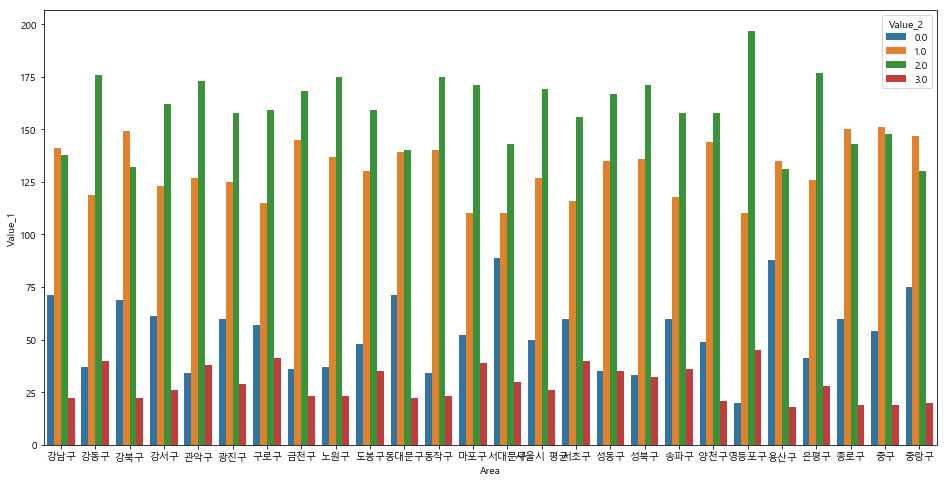

In [54]:
ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x='Area',y="Value_1",hue="Value_2",data=re_data_fin_group)